<a href="https://colab.research.google.com/github/MarioSigal/Procesamiento-de-Imagenes-/blob/main/Laboratorios/Laboratorio2_Pdi20251.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*Nombre de Grupos*: Nosotros

*Integrantes*: Azul Barracchia, Mario Sigal Aguirre, Lautaro Masetto, Leonardo Dominguez

# **Laboratorio 2: Convolucion, Filtros, Ruido y Bordes**

❗❗❗❗ ***Recuerden subir la carpeta `imagenes` antes de correr el codigo. Las imagenes se encuentran en la entrega*** ❗❗❗❗

Muchas de las técnicas que abordaremos se basan en la modificación de un píxel en relación con sus vecinos. Cuando esta transformación es constante a lo largo de la imagen, podemos expresarla utilizando una segunda imagen, $h$, que define la relación entre la vecindad. A esta operación la llamaremos **convolución**, y se denotará de la siguiente manera:

$$
m \ast h
$$

donde $m$ representa la imagen original y se leerá como: "**$m$ convolucionada con $h$**".

Aunque en su mayoría trabajaremos con convoluciones de señales 2D, esta operación también existe y se utiliza de forma análoga en otras dimensiones. Para entender mejor su funcionamiento, comenzaremos trabajando con señales 1D, lo cual nos ayudará a desarrollar la intuición necesaria para abordar la versión 2D.



## ***Convolucion 1D***


Para entender la convolución, primero es útil definir la **Delta de Kronecker**, que será fundamental para comprender cómo funciona esta operación.

La **Delta de Kronecker** es una señal que toma el valor 1 cuando su argumento es 0, y 0 en cualquier otro caso:

$$
\delta(x) =
\begin{cases}
1 & \text{si } x = 0 \\
0 & \text{si } x \neq 0
\end{cases}
$$

### **Representación de una señal como combinación lineal**

Imaginemos que tenemos la señal:

$$ S = [1, 2, 3, 4] $$

Podemos expresar cada elemento de la señal como una combinación lineal de los elementos originales, utilizando coeficientes que se van trasladando hacia la derecha. Es decir, cada valor de $S[n]$ depende de los valores anteriores y posteriores en la secuencia, de acuerdo con la siguiente fórmula:

* $ S[0] = 1 \cdot 1 + 2 \cdot 0 + 3 \cdot 0 + 4 \cdot 0$
* $ S[1] = 1 \cdot 0 + 2 \cdot 1 + 3 \cdot 0 + 4 \cdot 0$
* $ S[2] = 1 \cdot 0 + 2 \cdot 0 + 3 \cdot 1 + 4 \cdot 0$
* $ S[3] = 1 \cdot 0 + 2 \cdot 0 + 3 \cdot 0 + 4 \cdot 1$

Esta representación puede entenderse como una ***convolución*** de la señal $S$ con una señal formada solo por ceros y unos.

Para formalizar esta idea, podemos escribir la señal **$S$** como una combinación lineal infinita de desplazamientos de la señal original, utilizando la **Delta de Kronecker**:

$$
S[n] = \sum_{i=-\infty}^{+\infty} S[i] \cdot \delta(n - i)
$$

Donde los valores de $S[i]$ fuera de su rango están considerados como 0.




### **Definición de la Convolución**

Con este concepto en mente, podemos definir la **convolución** entre dos señales, $S$ y $h$, como:

$$
(S \ast h) [n] = \sum_{i=-\infty}^{+\infty} S[i] \cdot h(n - i)
$$

Aquí, la Delta de Kronecker actúa como el **elemento neutro** para la convolución. Es importante notar que la señal $h$ se invierte y cada uno de sus elemenentos se aplica sobre los elementos de $S$, desplazándose a lo largo de toda la señal y combinando los valores.


### **Intuicion como Filtro**
La convolución puede interpretarse como un "deslizamiento" del filtro $h$ a lo largo de la señal $S$. En cada paso, se calcula un valor ponderado de $S$ según los coeficientes de $h$. Este proceso genera una nueva señal $S \ast h$, que contiene la "versión filtrada" de la señal original.


### **Ejercicio**: Implementar Convolucion 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Notar que el resultado de la convolucion tendra el tamaño (h - 1) + s
# Pueden utilizar h[::-1] para conseguir una view invertida de h
def convolucion1D(s, h):
  # COMPLETAR
  n = h.size
  res = np.zeros((n - 1) + s.size)
  h = h[::-1]
  for i in range(s.size):
    for j in range(n):
      res[i + j] += s[i] * h[n - 1 - j]
  return res

In [2]:
h = np.asarray([0,0,0,1,0,0,0])
s = np.asarray([0,1,5,3,9,0,1,0])

convolucion1D(h,s)

array([0., 0., 0., 0., 1., 5., 3., 9., 0., 1., 0., 0., 0., 0.])

#### **Ejemplos de Convolucion 1D**
Antes de ver el resultado de la convolucion, vean las dos señales por si solas y piensen que forma tendra la señal de salida, pueden intentar dibujarlas.

Jueguen con las señales de entrada hasta entender que es lo que esta sucediendo atras y porque se llegan a estos resultados.

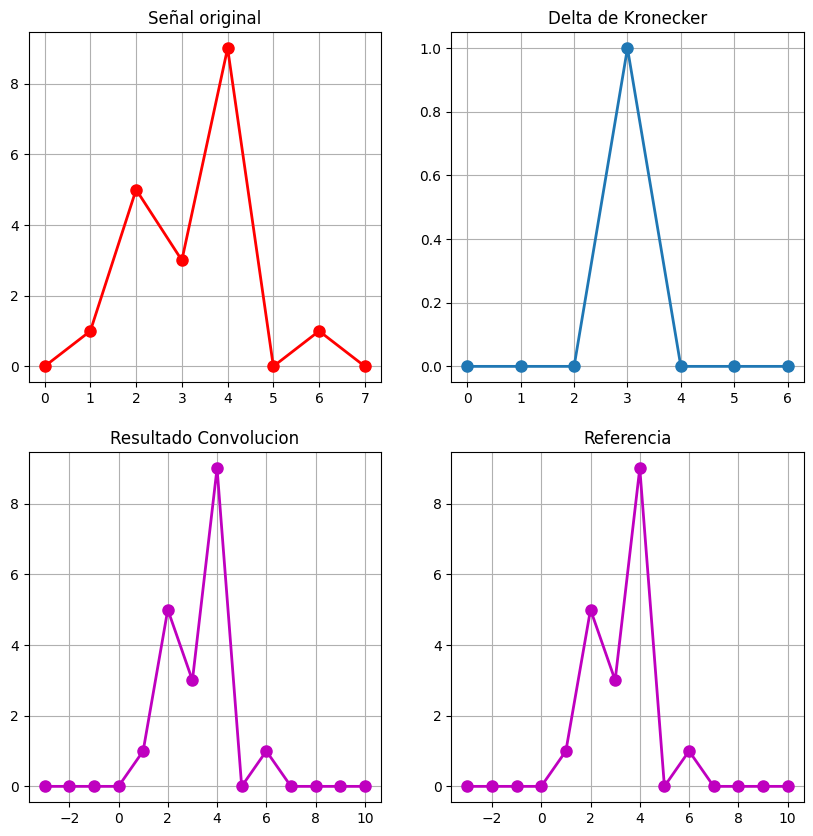

In [3]:

delta = np.asarray([0,0,0,1,0,0,0])
s = np.asarray([0,1,5,3,9,0,1,0])

resConvolucion = convolucion1D(s, delta)
# Convolucion de referencia
scipyConvolucion = np.convolve(s, delta)

# El origen de la señal de filtro sera su medio, por eso siempre trabajaremos
# con filtros de longitud impar.
ejeX = range(-delta.size // 2 + 1, s.size + delta.size // 2)

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax = np.ravel(ax)

ax[0].set_title("Señal original")
ax[0].grid(True)
ax[0].plot(s, marker='o', color='r', linestyle='-', linewidth=2, markersize=8)

ax[1].set_title("Delta de Kronecker")
ax[1].grid(True)
ax[1].plot(delta,marker='o', linestyle='-', linewidth=2, markersize=8)

ax[2].set_title("Resultado Convolucion")
ax[2].grid(True)
ax[2].plot(ejeX, resConvolucion, marker='o', color='m', linestyle='-', linewidth=2, markersize=8)

ax[3].set_title("Referencia")
ax[3].grid(True)
ax[3].plot(ejeX, scipyConvolucion, marker='o', color='m', linestyle='-', linewidth=2, markersize=8)
plt.show()


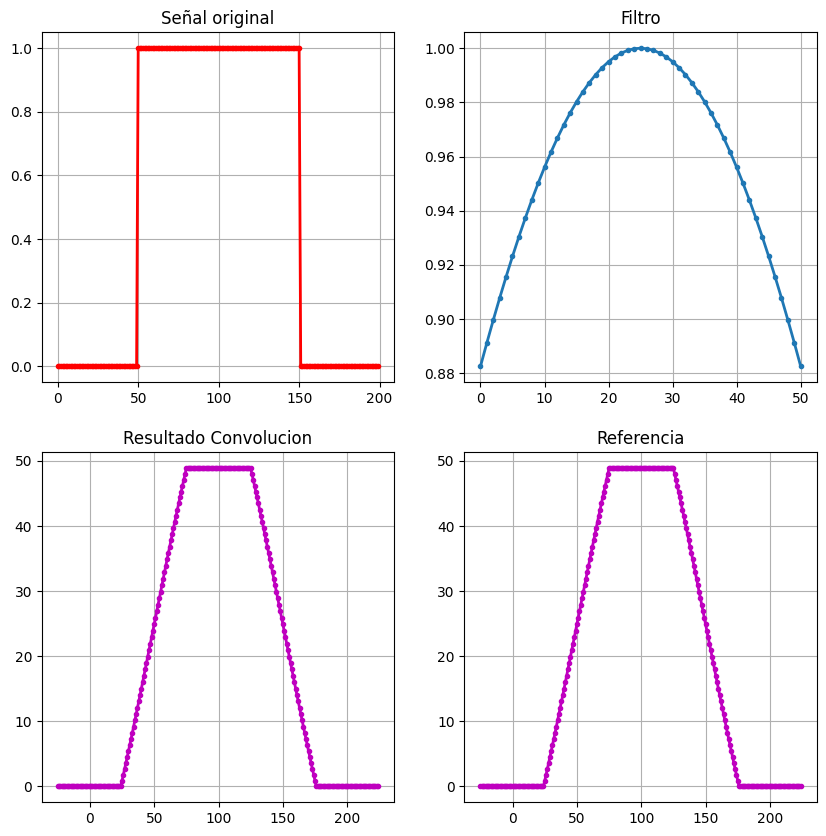

In [4]:
from scipy import signal

gauss = signal.windows.gaussian(51, std=50)

#Creamos una señal cuadrada
s = np.zeros(200)
s[50:151] = 1

resConvolucion = convolucion1D(s, gauss)
# Convolucion de referencia
scipyConvolucion = np.convolve(s, gauss)

# El origen de la señal de filtro sera su medio, por eso siempre trabajaremos
# con filtros de longitud impar.
ejeX = range(-gauss.size // 2 + 1, s.size + gauss.size // 2)

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax = np.ravel(ax)

ax[0].set_title("Señal original")
ax[0].grid(True)
ax[0].plot(s, marker='o', color='r', linestyle='-', linewidth=2, markersize=3)

ax[1].set_title("Filtro")
ax[1].grid(True)
ax[1].plot(gauss,marker='o', linestyle='-', linewidth=2, markersize=3)

ax[2].set_title("Resultado Convolucion")
ax[2].grid(True)
ax[2].plot(ejeX, resConvolucion, marker='o', color='m', linestyle='-', linewidth=2, markersize=3)

ax[3].set_title("Referencia")
ax[3].grid(True)
ax[3].plot(ejeX, scipyConvolucion, marker='o', color='m', linestyle='-', linewidth=2, markersize=3)
plt.show()

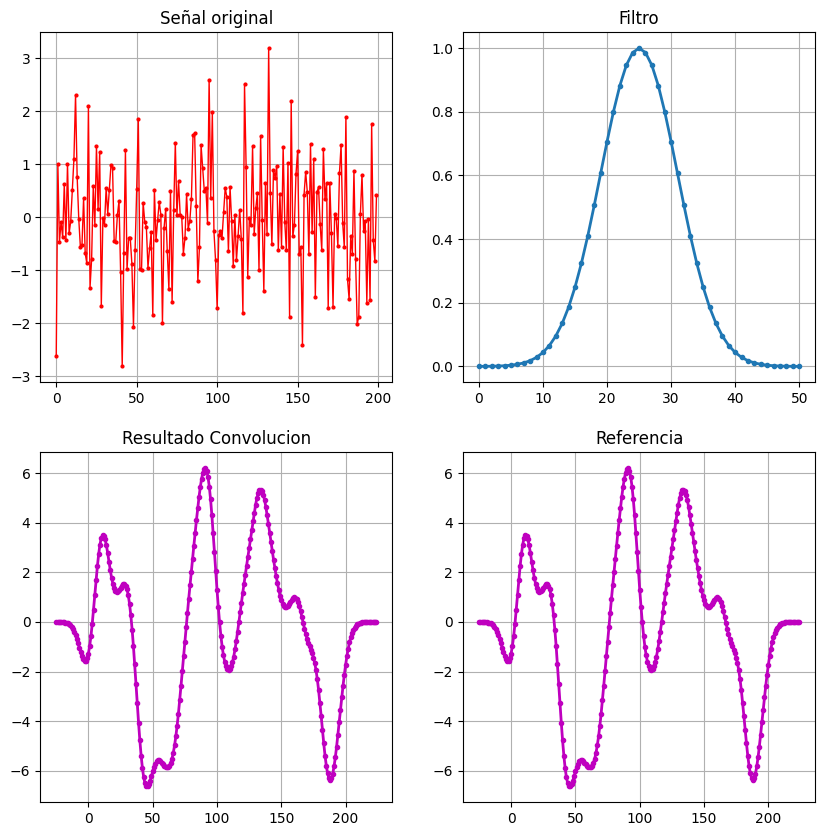

In [5]:
from scipy import signal

# Creamos una señal gaussiana
gauss = signal.windows.gaussian(51, std=6)

#Creamos una señal aleatoria
s = np.random.randn(200)

resConvolucion = convolucion1D(s, gauss)
# Convolucion de referencia
scipyConvolucion = np.convolve(s, gauss)

# El origen de la señal de filtro sera su medio, por eso siempre trabajaremos
# con filtros de longitud impar.
ejeX = range(-gauss.size // 2 + 1, s.size + gauss.size // 2)

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax = np.ravel(ax)

ax[0].set_title("Señal original")
ax[0].grid(True)
ax[0].plot(s, marker='o', color='r', linestyle='-', linewidth=1, markersize=2)

ax[1].set_title("Filtro")
ax[1].grid(True)
ax[1].plot(gauss,marker='o', linestyle='-', linewidth=2, markersize=3)

ax[2].set_title("Resultado Convolucion")
ax[2].grid(True)
ax[2].plot(ejeX, resConvolucion, marker='o', color='m', linestyle='-', linewidth=2, markersize=3)

ax[3].set_title("Referencia")
ax[3].grid(True)
ax[3].plot(ejeX, scipyConvolucion, marker='o', color='m', linestyle='-', linewidth=2, markersize=3)
plt.show()

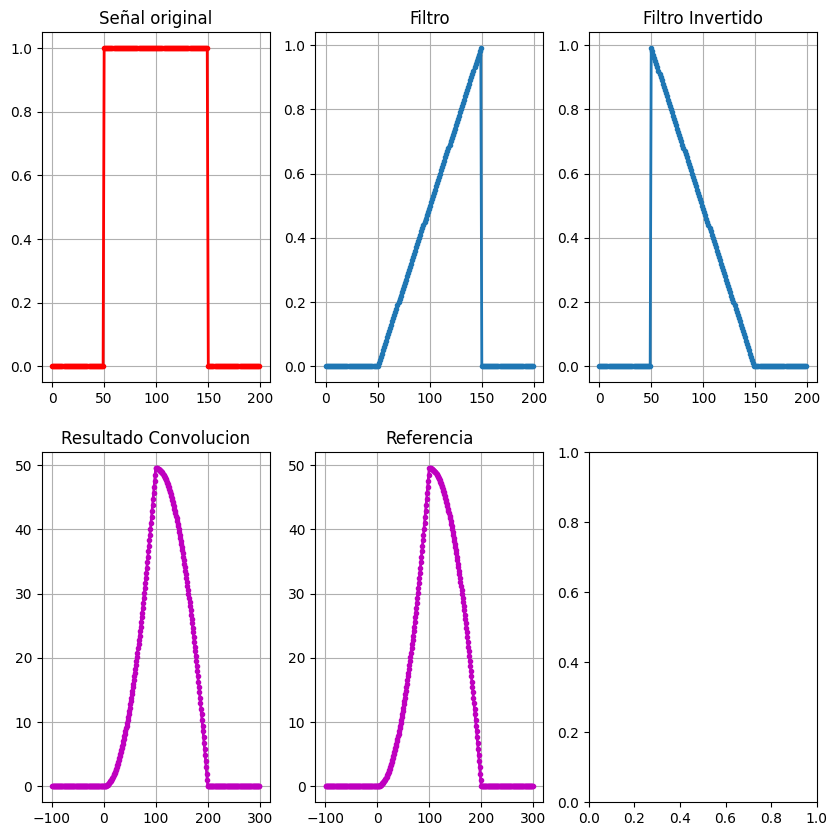

In [6]:
from scipy import signal

#Creamos una señal sierra
h = np.zeros(200)
h[50:150] = np.arange(0,1,0.01)

#Creamos una señal cuadrada
s = np.zeros(200)
s[50:150] = 1

resConvolucion = convolucion1D(s, h)
# Convolucion de referencia
scipyConvolucion = np.convolve(s, h)

# El origen de la señal de filtro sera su medio, por eso siempre trabajaremos
# con filtros de longitud impar.
ejeX = range(-h.size // 2 + 1, s.size + h.size // 2)


fig, ax = plt.subplots(2,3,figsize=(10,10))
ax = np.ravel(ax)

ax[0].set_title("Señal original")
ax[0].grid(True)
ax[0].plot(s, marker='o', color='r', linestyle='-', linewidth=2, markersize=3)

ax[1].set_title("Filtro")
ax[1].grid(True)
ax[1].plot(h,marker='o', linestyle='-', linewidth=2, markersize=3)

ax[2].set_title("Filtro Invertido")
ax[2].grid(True)
ax[2].plot(h[::-1],marker='o', linestyle='-', linewidth=2, markersize=3)


ax[3].set_title("Resultado Convolucion")
ax[3].grid(True)
ax[3].plot(ejeX, resConvolucion, marker='o', color='m', linestyle='-', linewidth=2, markersize=3)

ax[4].set_title("Referencia")
ax[4].grid(True)
ax[4].plot(ejeX, scipyConvolucion, marker='o', color='m', linestyle='-', linewidth=2, markersize=3)
plt.show()

### **Ejercicio**: Implentar convolucion por fila
Dada una imagen y un filtro, devolver la imagen de convolucionar cada fila por el filtro

In [14]:
def convolucionPorFila(imagen, filtro):
  # COMPLETAR
  imagenRes = np.zeros((imagen.shape[0], imagen.shape[1] + filtro.size - 1))
  for i in range(imagen.shape[0]):
    imagenRes[i] = convolucion1D(imagen[i], filtro)

  pad = (filtro.size - 1) // 2
  imagenRes = imagenRes[:, pad:pad+imagen.shape[1]]
  return imagenRes

In [8]:
from skimage import data, util, exposure,io

# Utilizamos un tipo de dato con mayor precision para no tener problemas en la convolucion
imagenOriginal = util.img_as_float32(io.imread("/content/imagenes/ojoMandril.png", as_gray=True))

# Fila para ver UN resultado individual de la convolucion
FILA_MUESTRA = 25
filaImagen = imagenOriginal[FILA_MUESTRA,:]

# Cramos una señal sierra
filtro = np.zeros(50)
filtro[15:35] = np.arange(0,1,0.05)

#Convolucionamos la fila individual
filaConvolucionada = convolucion1D(filaImagen, filtro)

# Convolucionamos por fila a toda la imagen
# Ajustamos el rango para acabar en un rango valido
imagenConvolucionada = convolucionPorFila(imagenOriginal, filtro)
imagenConvolucionada = exposure.rescale_intensity(imagenConvolucionada,
                                                  in_range=(imagenConvolucionada.min(), imagenConvolucionada.max()),
                                                  out_range=(0, 1))

# Mostramos el resultado
fig, axs = plt.subplots(2,3, figsize=(20,10))
axs = np.ravel(axs)

axs[0].set_title(f"Fila {FILA_MUESTRA}")
axs[0].grid(True)
axs[0].plot(filaImagen, color='r', linestyle='-', linewidth=0.5)

axs[1].set_title("Filtro")
axs[1].grid(True)
axs[1].plot(filtro, marker='o', linestyle='-', linewidth=2, markersize=3)

axs[2].set_title("Resultado Convolucion")
axs[2].grid(True)
axs[2].plot(filaConvolucionada, marker='o', color='m', linestyle='-', linewidth=2, markersize=3)


axs[3].imshow(imagenOriginal, cmap='gray', clim=(0,1))
axs[3].axhline(y=FILA_MUESTRA, color='r', linestyle='-')
axs[3].set_title("Imagen Original")
axs[3].axis("off")

axs[4].set_title("Filtro")
axs[4].grid(True)
axs[4].plot(filtro, marker='o', linestyle='-', linewidth=2, markersize=3)

axs[5].imshow(imagenConvolucionada, cmap='gray', clim=(0,1))
axs[5].set_title("Resultado Convolucion")
axs[5].axis("off")

plt.tight_layout()
plt.show()

FileNotFoundError: No such file: 'c:\content\imagenes\ojoMandril.png'

## ***CHECKPOINT 1 !!!***

## **Convolución 2D**

Al igual que en la convolución 1D, podemos interpretar las imágenes como combinaciones lineales de sus valores, pero ahora trabajaremos en un espacio bidimensional.


### **Delta de Kronecker en 2D**

Para comenzar, veamos como la **delta de Kronecker** se extiende a dos dimensiones de la siguiente manera:

$$
\delta(x, y) =
\begin{cases}
1 & \text{si } x = 0 \text{ y } y = 0 \\
0 & \text{si } x \neq 0 \text{ o } y \neq 0
\end{cases}
$$

Esta imagen otra vez servirá como el **elemento neutro** en nuestras definiciones.

### **Representación de una imagen como combinación lineal**

Supongamos que tenemos una imagen $M$ representada de la siguiente manera:

$$
M =
\begin{bmatrix}
A & B \\
C & D
\end{bmatrix}
$$

Podemos reescribir esta imagen como una combinación lineal de sus componentes, similar a lo que hicimos en la convolución 1D. Cada elemento de la imagen se obtiene al multiplicar cada valor por un 0 o 1:

- $M[0,0] = A \cdot 1 + B \cdot 0 + C \cdot 0 + D \cdot 0$
- $M[0,1] = A \cdot 0 + B \cdot 1 + C \cdot 0 + D \cdot 0$
- $M[1,0] = A \cdot 0 + B \cdot 0 + C \cdot 1 + D \cdot 0$
- $M[1,1] = A \cdot 0 + B \cdot 0 + C \cdot 0 + D \cdot 1$

Podemos verlo como el resultado de una **convolución** de una imagen compuesta por 1 y 0s. Utilizando la Delta de Kronecker podriamos escribir:
$$
M[n,m] = \sum_{i=-\infty}^{+\infty}\sum_{j=-\infty}^{+\infty} M[i][j] \cdot \delta(n - i, m - i)
$$



### **Definicion de la Convolución 2D**

Ahora, introduzcamos la **convolución 2D**. Al igual que en la convolución 1D, podemos definir la convolución entre dos señales, $M$ y $h$, de la siguiente manera:

$$
M[n,m] = \sum_{i=-\infty}^{\infty} \sum_{j=-\infty}^{\infty} M[i,j] \cdot h(n - i, m - j)
$$

En esta fórmula, $M[i,j]$ son los valores de la imagen original, y $h$ es una función que se aplica sobre cada valor de $M$. La imagen $h$ es desplazada y girada 180 grados durante el proceso, lo que permite aplicar un filtro sobre la imagen original.

### **Intuición detrás de la Convolución 2D como Filtro**

Al igual que en 1D, la convolucion puede pensarse como un **filtro**. En cada paso de la operación, calculamos un valor ponderado de los elementos de la imagen $M$ utilizando los coeficientes del **Filtro/Kernel** $h$ y los valores de los píxeles vecinos. Esto da como resultado una nueva imagen $M \ast h$, que es una versión filtrada de la imagen original.

### **Ejemplos de Convolucion 2D**
Utilizaremos el metodo `ndimage.convolve` de la biblioteca scipy para realizar las convoluciones.



<>:14: SyntaxWarning: invalid escape sequence '\T'
<>:14: SyntaxWarning: invalid escape sequence '\T'
C:\Users\leodo\AppData\Local\Temp\ipykernel_15300\1258762233.py:14: SyntaxWarning: invalid escape sequence '\T'
  imagenBlancoNegro = util.img_as_float32(io.imread("..\Tareas\imagenes\imagenDePruebaPSF.png", as_gray=True))


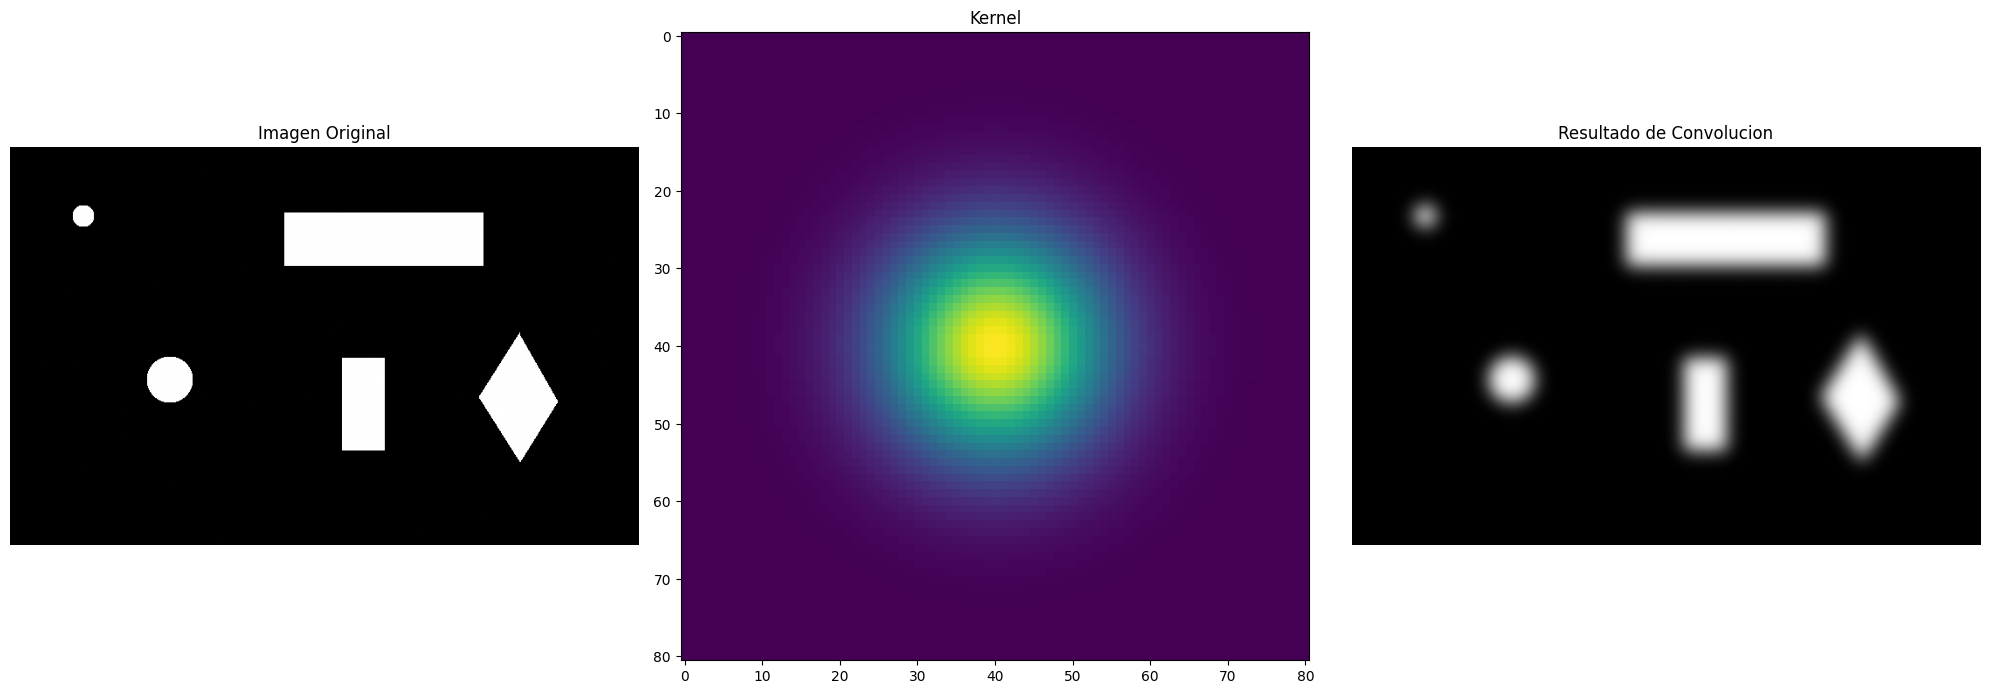

In [15]:
from skimage import data, util, exposure,io
from scipy import ndimage

def kernelDePrueba(x,y):
  return np.exp(-(x**2)/(2*(10)**2) - (y**2)/(2*(10)**2))

ejeX = np.arange(-40, 41)
ejeY = np.arange(-40, 41)

# Creamos un Kernel/filtro para aplicar sobre la imagen
X,Y = np.meshgrid(ejeX, ejeY)
kernel = kernelDePrueba(X, Y).T

imagenBlancoNegro = util.img_as_float32(io.imread("..\Tareas\imagenes\imagenDePruebaPSF.png", as_gray=True))

# Realizamos la convolucion entre las imagenes
imagenConv = ndimage.convolve(imagenBlancoNegro, kernel)
imagenConv = exposure.rescale_intensity(imagenConv,
                                        in_range=(imagenConv.min(), imagenConv.max()),
                                                  out_range=(0, 1))

# Mostramos el resultado
fig, axs = plt.subplots(1,3, figsize=(20,10))

axs[0].imshow(imagenBlancoNegro, cmap='gray', clim=(0,1))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(kernel)
axs[1].set_title("Kernel")

axs[2].imshow(imagenConv, cmap='gray', clim=(0,1))
axs[2].set_title("Resultado de Convolucion")
axs[2].axis("off")

plt.tight_layout()
plt.show()


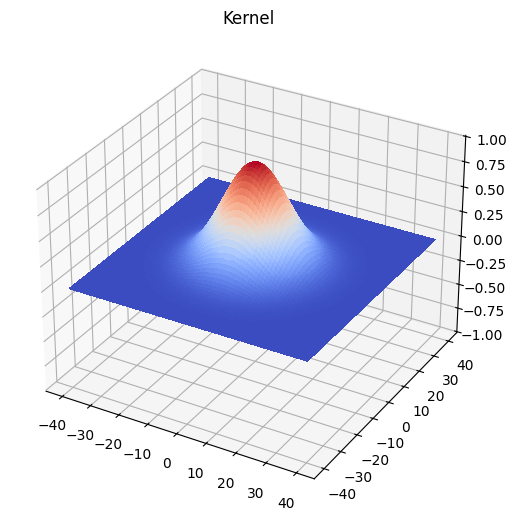

In [ ]:
from matplotlib import cm

# Podemos ver al Kernel en 3d para entender mejor lo que sucede
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')

surf = ax.plot_surface(X, Y, kernel, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
ax.set_title("Kernel")
plt.tight_layout()
plt.show()

### **Ejercicio: Implementar un filtro Gaussiano**
Dada una imagen y un sigma, devolver la imagen resultante de haber convolucionado la imagen de entrada con la distribucion de Gauss correspondiente. No es necesario que el filtro devuelve una imagen en el rango valido.

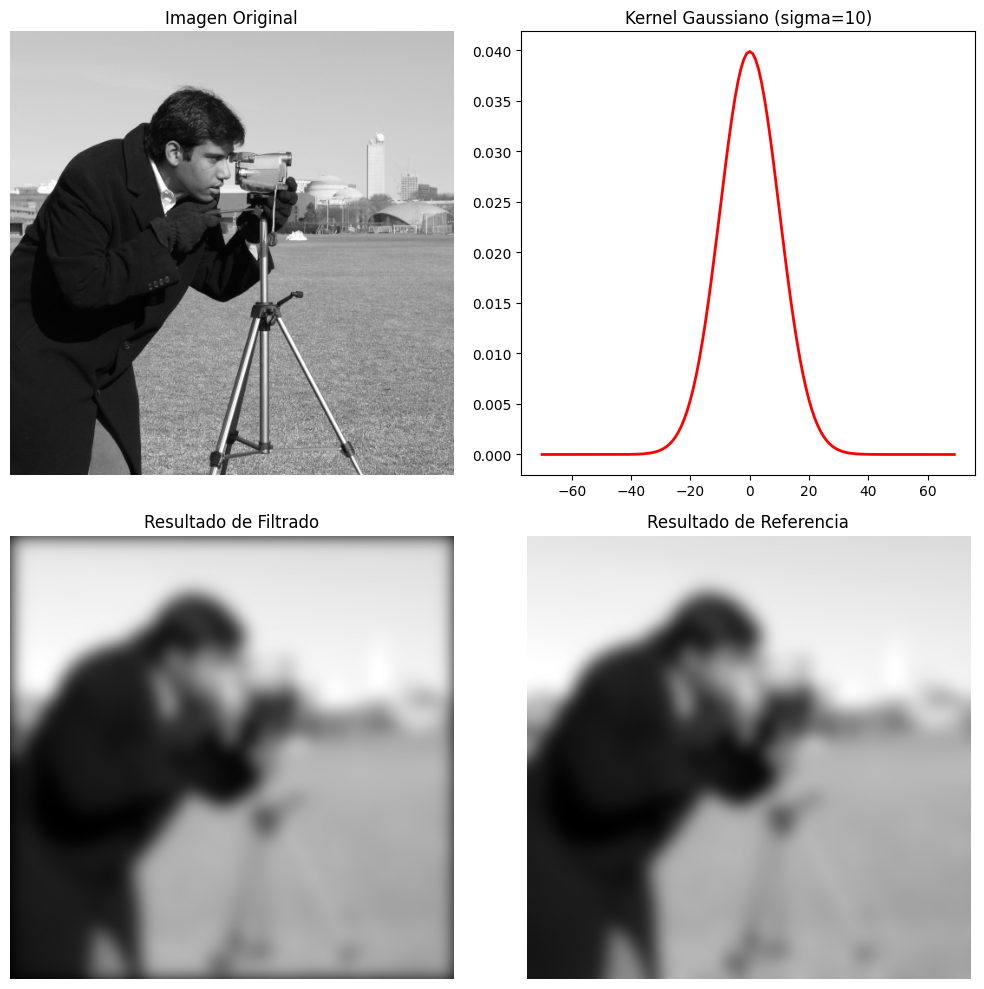

In [16]:
from skimage import filters

# Pueden utilizar la cuenta 2 * int(4 * sigma + 0.5) + 1 para conocer el tamaño correcto del Kernel
def filtroGaussiano(imagen, sigma):
  tamañoKernel = 2 * int(4 * sigma + 0.5) + 1
  x = np.arange(-tamañoKernel//2, tamañoKernel//2 + 1)
  filtro = gauss1D(x, sigma)

  imagen_filtrada_fila = convolucionPorFila(imagen, filtro)

  imagen_filtrada_columna = convolucionPorFila(imagen_filtrada_fila.T, filtro).T

  return np.copy(imagen_filtrada_columna)

## Devuelve una distribucion Gausseana con el sigma indicado.
## La usamos para plotear la gausseana utilizada en 1 dimension.
def gauss1D(x,sigma):
  return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x**2) / (2 * sigma**2))


SIGMA = 10
imagenBlancoNegro = util.img_as_float32(data.camera())

# Filtramos la imagen
imagenFiltrada = filtroGaussiano(imagenBlancoNegro, SIGMA)
imagenFiltrada = exposure.rescale_intensity(imagenFiltrada,
                                        in_range=(imagenFiltrada.min(), imagenFiltrada.max()),
                                                  out_range=(0, 1))

# Resultado de Referencia
filtroReferencia = filters.gaussian(imagenBlancoNegro, SIGMA)
filtroReferencia = exposure.rescale_intensity(filtroReferencia,
                                        in_range=(filtroReferencia.min(), filtroReferencia.max()),
                                                  out_range=(0, 1))

# Mostramos el resultado
fig, axs = plt.subplots(2,2, figsize=(10,10))
axs = np.ravel(axs)

axs[0].imshow(imagenBlancoNegro, cmap='gray', clim=(0,1))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].plot(np.arange(-70,70), gauss1D(np.arange(-70,70), SIGMA), linewidth=2, color='r')
axs[1].set_title(f"Kernel Gaussiano (sigma={SIGMA})")

axs[2].imshow(imagenFiltrada, cmap='gray', clim=(0,1))
axs[2].set_title("Resultado de Filtrado")
axs[2].axis("off")

axs[3].imshow(filtroReferencia, cmap='gray', clim=(0,1))
axs[3].set_title("Resultado de Referencia")
axs[3].axis("off")

plt.tight_layout()
plt.show()

### **Ejercicio**: Implementar un filtro de Realce de Bordes.
Dada una imagen, devolver su version con los bordes realzados utilizando Unsharp Masking

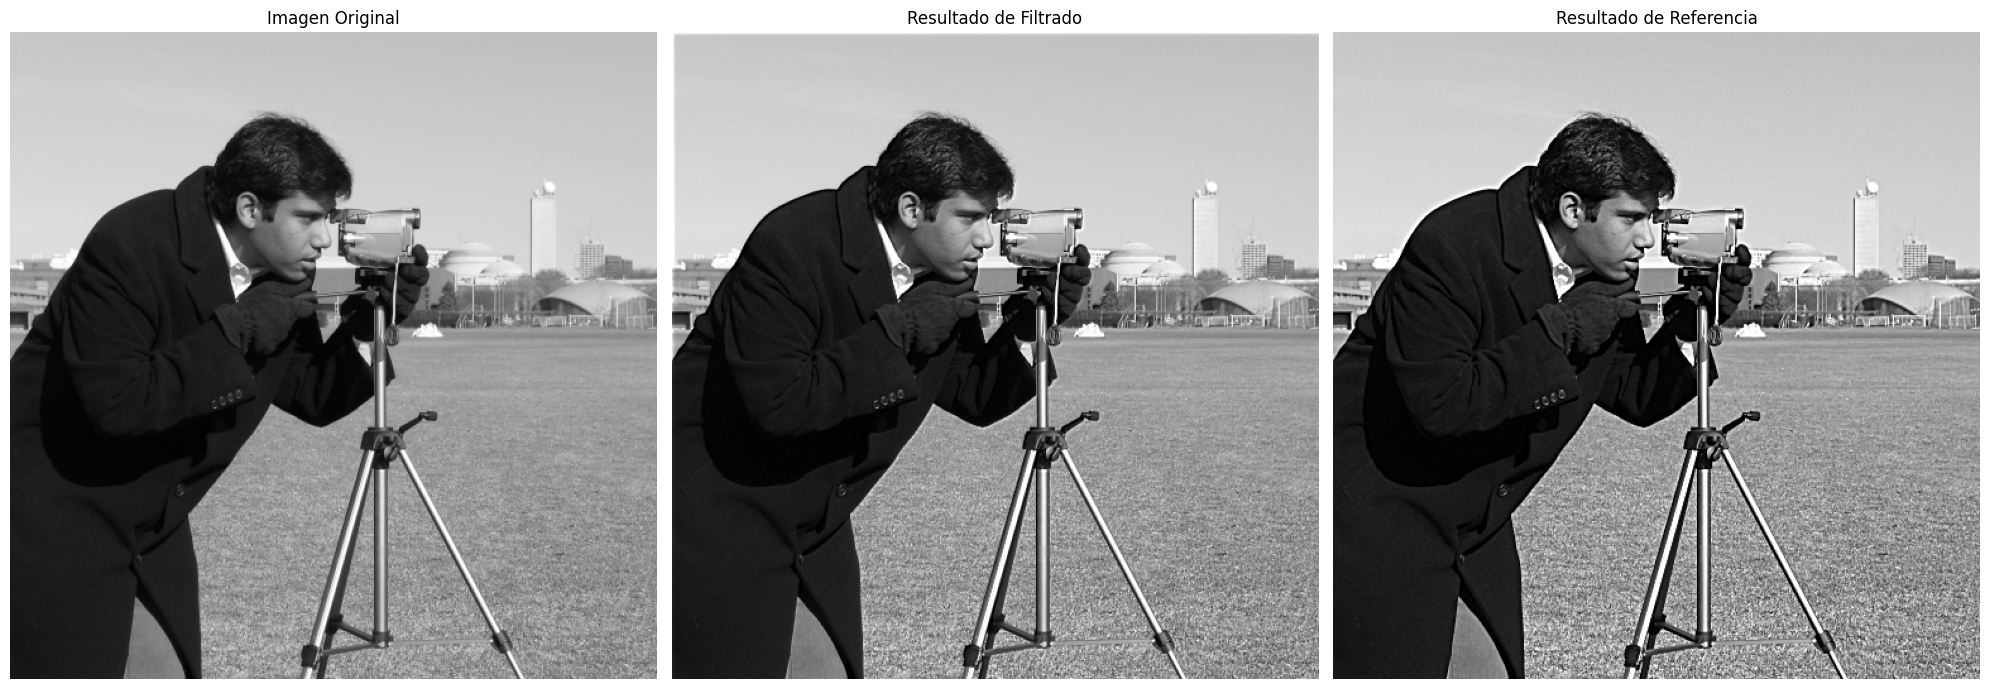

In [37]:
def SharpImage(imagen):
  
  sigma = 1
  imagen_filtrada = filtroGaussiano(imagen, sigma)

  mascara = imagen - imagen_filtrada
  
  imagen_sharp = imagen + 0.5 * mascara
  imagen_res = np.clip(imagen_sharp, 0, 1)
 
  return imagen_res

imagenBlancoNegro = util.img_as_float32(data.camera())

# Filtramos la imagen
imagenFiltrada = SharpImage(imagenBlancoNegro)
imagenFiltrada = exposure.rescale_intensity(imagenFiltrada,
                                        in_range=(imagenFiltrada.min(), imagenFiltrada.max()),
                                                  out_range=(0, 1))

# Resultado de referencia
referencia = filters.unsharp_mask(imagenBlancoNegro, radius=2, amount=1)
referencia = exposure.rescale_intensity(referencia,
                                        in_range=(referencia.min(), referencia.max()),
                                                  out_range=(0, 1))

# Mostramos el resultado
fig, axs = plt.subplots(1,3, figsize=(20,10))

axs[0].imshow(imagenBlancoNegro, cmap='gray', clim=(0,1))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(imagenFiltrada, cmap='gray', clim=(0,1))
axs[1].set_title("Resultado de Filtrado")
axs[1].axis("off")


axs[2].imshow(referencia, cmap='gray', clim=(0,1))
axs[2].set_title("Resultado de Referencia")
axs[2].axis("off")

plt.tight_layout()
plt.show()

## **Ruidos**

El ruido es una señal no deseada que se mezcla con una señal útil en cualquier sistema de comunicación o proceso. En procesamiento de imagenes nos enfocaremos pricipalmente en ruido Gausseano y Rayleigh, los dos causados por los sensores utilizados en la obtencion de imagenes y con una funcion de probabilida clara.

### **Ruido Gaussiano**

$$G(x, y) = \frac{1}{2 \pi \sigma_x \sigma_y} \exp \left( - \frac{1}{2} \left[ \left( \frac{x}{\sigma_x} \right)^2 + \left( \frac{y}{\sigma_y} \right)^2 \right] \right)$$

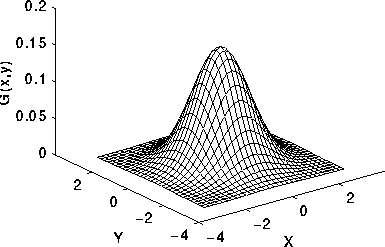

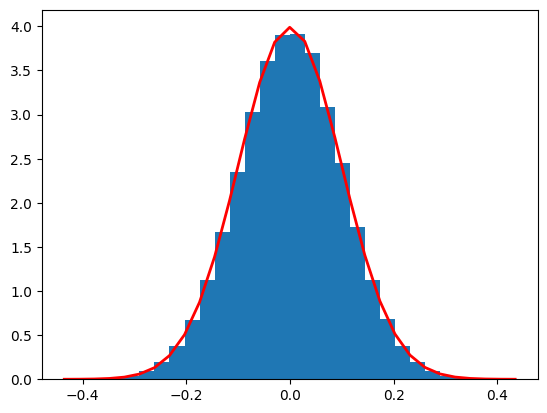

In [38]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 100000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

### **Ruido Rayleigh**

$$f(r) = \frac{r}{\sigma^2} \exp\left( -\frac{r^2}{2\sigma^2} \right)$$
\
$$r = \sqrt{x^2+y^2}$$

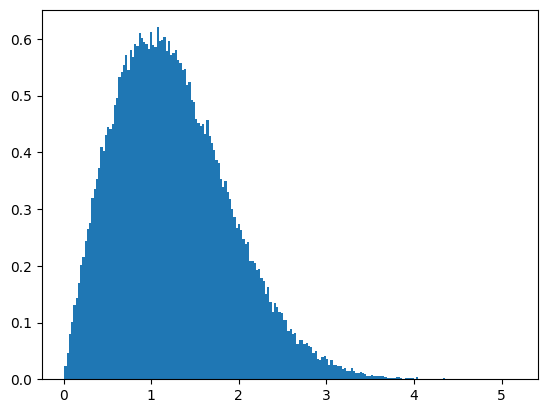

In [44]:
plt.hist(np.random.rayleigh(1, 100000), bins=200, density=True)
plt.show()

### **Efecto de Ruido en Filtros**
Vean como evoluciona la imagen luego de varias operaciones de Sharpening. Hagan el experimento agregando Ruido Gausseana, Rayleigh y Salt and Pepper

In [45]:
def evolucion(imagenOriginal, aplicaciones):
  evolucionRuido = [imagenOriginal]
  for i in range(aplicaciones):
    imagenBorde = SharpImage(evolucionRuido[i])
    imagenBorde = exposure.rescale_intensity(imagenBorde,
                                           in_range=(imagenBorde.min(), imagenBorde.max()),
                                           out_range=(0, 1))
    evolucionRuido.append(imagenBorde)
  return evolucionRuido

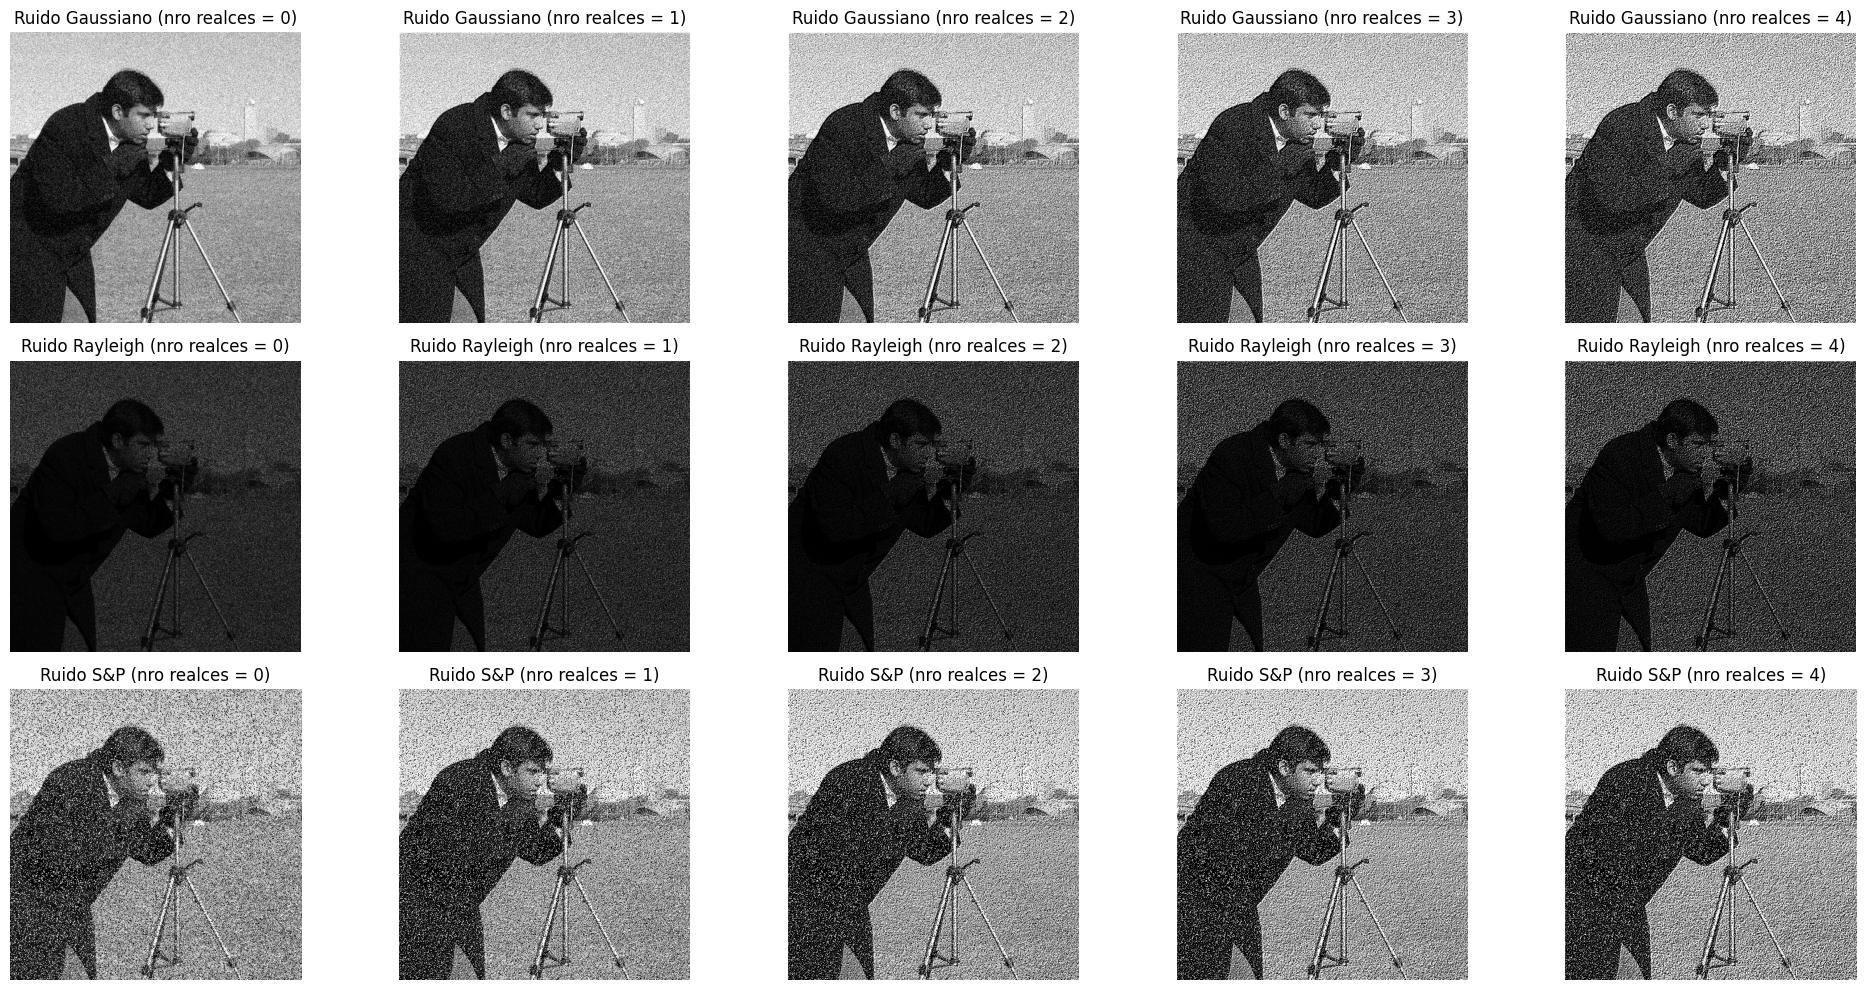

In [ ]:
aplicacionesSucesivas = 4

imagenPrueba = util.img_as_float32(data.camera())

# Agregamos ruido Gausseano Aditivo
ImagenConRuidoGausseano = util.random_noise(imagenPrueba, mode='gaussian', mean=0, var=0.01)
#Agregamos ruido Rayleigh Multiplicativo
imagenConRayleigh =  imagenPrueba * np.random.rayleigh(0.2, imagenPrueba.shape)
# Agregamos SaltAndPepper
ImagenConSaltAndPepper = util.random_noise(imagenPrueba, mode='s&p', amount=0.3)

# Vemos la evolucion de cada uno
evolucionRuidoG = evolucion(ImagenConRuidoGausseano, aplicacionesSucesivas)
evolucionRayleigh = evolucion(imagenConRayleigh, aplicacionesSucesivas)
evolucionSaltAndPepper = evolucion(ImagenConSaltAndPepper, aplicacionesSucesivas)

fig, axes = plt.subplots(3, aplicacionesSucesivas + 1, figsize=(20, 10))

for i in range(aplicacionesSucesivas + 1):
  axes[0][i].imshow(evolucionRuidoG[i], cmap=plt.cm.gray, clim=(0,1))
  axes[0][i].set_title(f"Ruido Gaussiano (nro realces = {i})")
  axes[0][i].axis("off")


for i in range(aplicacionesSucesivas + 1):
  axes[1][i].imshow(evolucionRayleigh[i], cmap=plt.cm.gray, clim=(0,1))
  axes[1][i].set_title(f"Ruido Rayleigh (nro realces = {i})")
  axes[1][i].axis("off")

for i in range(aplicacionesSucesivas + 1):
  axes[2][i].imshow(evolucionSaltAndPepper[i], cmap=plt.cm.gray, clim=(0,1))
  axes[2][i].set_title(f"Ruido S&P (nro realces = {i})")
  axes[2][i].axis("off")

fig.tight_layout()
plt.show()


## ***CHECKPOINT 2 !!!***

## **Deteccion de Borde por Metodo de Gradiante**

### **Implemente los operadores de Roberts, Prewitt y Sobel**

#### ***Roberts***

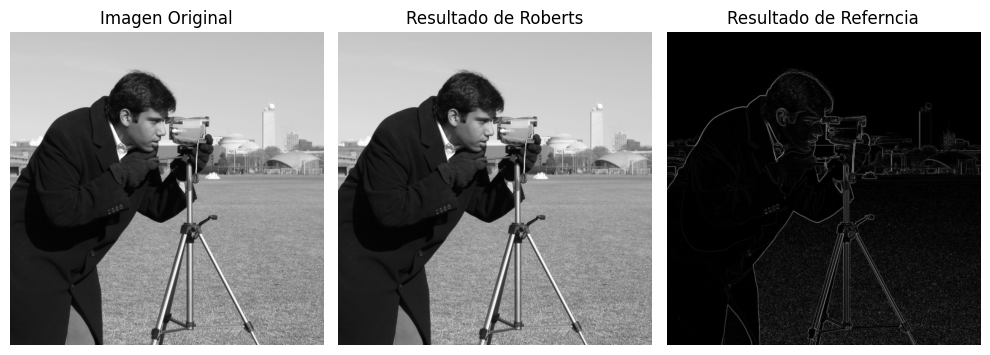

In [ ]:
def Roberts(image, thresholdBorde):
  # COMPLETAR
  return np.copy(image)

imagenPrueba = util.img_as_float32(data.camera())

imagenBordes = Roberts(imagenPrueba, 0)
imagenBordesSkiImg = filters.roberts(imagenPrueba)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].imshow(imagenPrueba, cmap='gray', clim=(0,1))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(imagenBordes, cmap='gray', clim=(0,1))
axs[1].set_title("Resultado de Roberts")
axs[1].axis("off")

axs[2].imshow(imagenBordesSkiImg, cmap='gray', clim=(0,1))
axs[2].set_title("Resultado de Referncia")
axs[2].axis("off")


fig.tight_layout()
plt.show()

#### ***Prewitt***

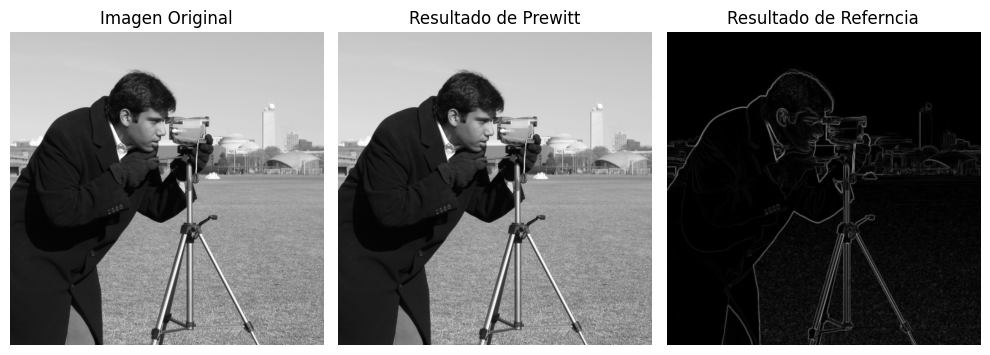

In [ ]:
def Prewitt(image, thresholdBorde):
  # COMPLETAR
  return np.copy(image)

imagenPrueba = util.img_as_float32(data.camera())

imagenBordes = Prewitt(imagenPrueba, 0)
imagenBordesSkiImg = filters.prewitt(imagenPrueba)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].imshow(imagenPrueba, cmap='gray', clim=(0,1))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(imagenBordes, cmap='gray', clim=(0,1))
axs[1].set_title("Resultado de Prewitt")
axs[1].axis("off")

axs[2].imshow(imagenBordesSkiImg, cmap='gray', clim=(0,1))
axs[2].set_title("Resultado de Referncia")
axs[2].axis("off")


fig.tight_layout()
plt.show()

#### ***Sobel***

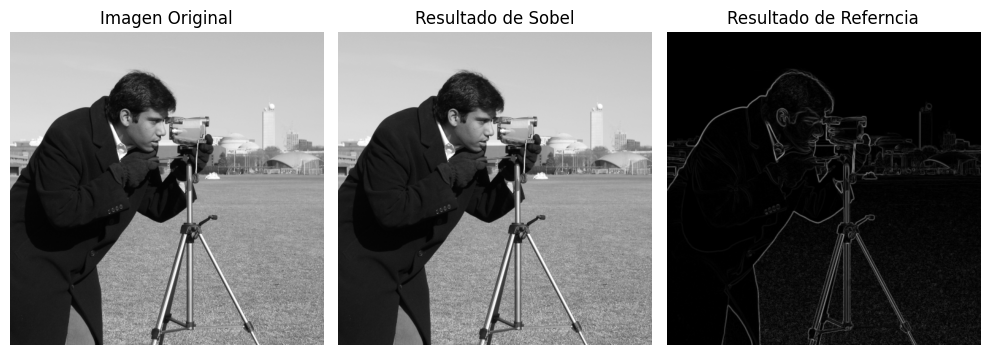

In [ ]:
def Sobel(image, thresholdBorde):
  return np.copy(image)

imagenPrueba = util.img_as_float32(data.camera())

imagenBordes = Sobel(imagenPrueba, 0.1)
imagenBordesSkiImg = filters.sobel(imagenPrueba)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].imshow(imagenPrueba, cmap='gray', clim=(0,1))
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(imagenBordes, cmap='gray', clim=(0,1))
axs[1].set_title("Resultado de Sobel")
axs[1].axis("off")

axs[2].imshow(imagenBordesSkiImg, cmap='gray', clim=(0,1))
axs[2].set_title("Resultado de Referncia")
axs[2].axis("off")


fig.tight_layout()
plt.show()

### **Efecto de Ruido en la extraccion de Bordes**

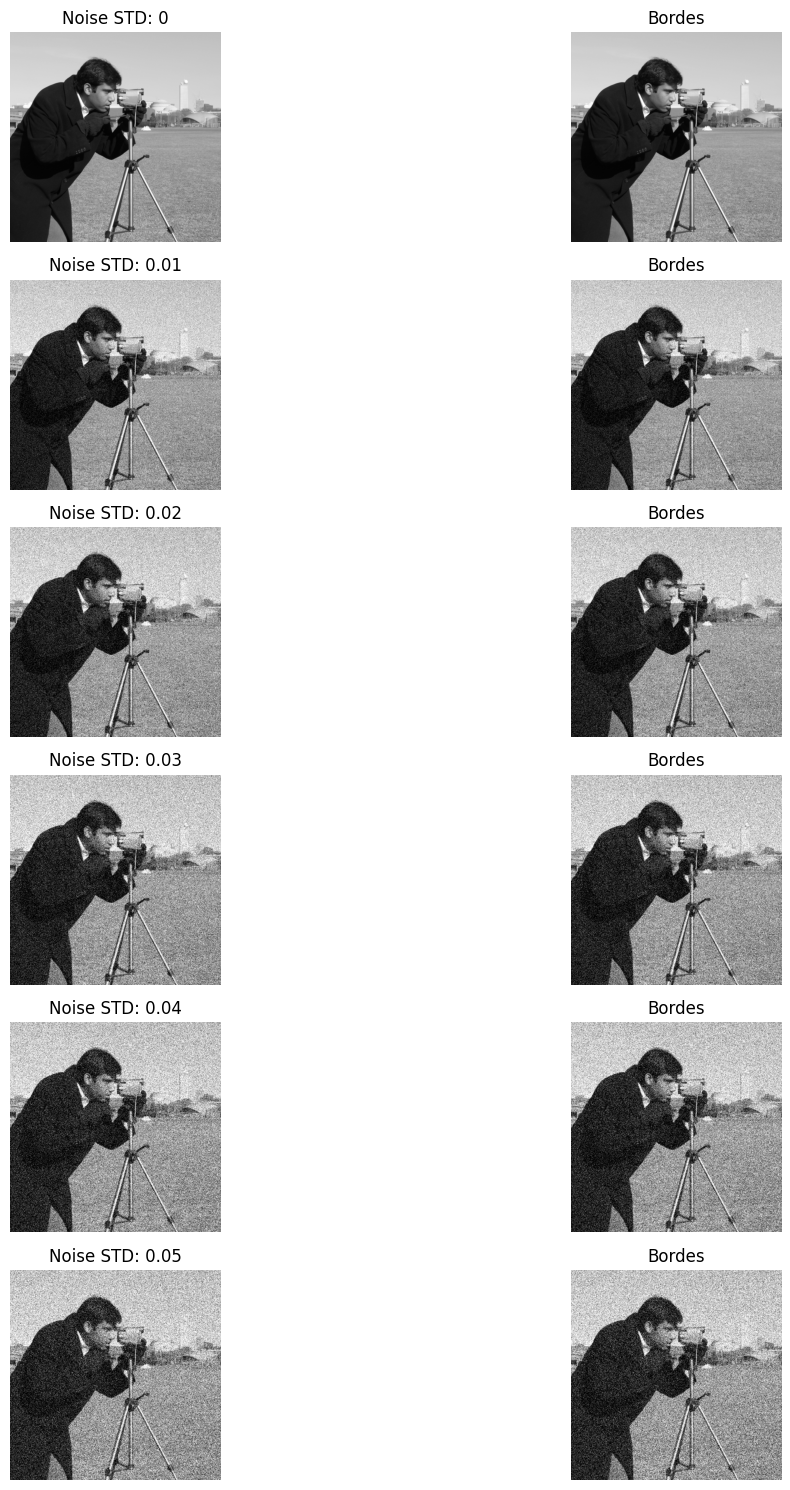

In [ ]:
imagenOriginal = util.img_as_float32(data.camera())

# Numero de iteraciones a agregar ruido
iteraciones = 5
# std inicial del ruido
stdInicial = 0.01
# incremento del std por cada iteracion
stdIncremento = 0.01

# Threshold para bordes
threshold = 0.2

# Cargamos como la imagen cambio con el ruido y su resultado con Sobel
evolucionRuido = [imagenOriginal]
evolucionRuidoBordes = [Sobel(imagenPrueba, threshold)]

for i in range(0, iteraciones):
    # Incrementamos la std en cada iteracion
    stdRuido = stdInicial + i * stdIncremento
    imagenRuido = util.random_noise(imagenPrueba, mode='gaussian', mean=0, var=stdRuido)

    evolucionRuido.append(imagenRuido)
    evolucionRuidoBordes.append(Sobel(imagenRuido, threshold))

fig, axs = plt.subplots(iteraciones + 1, 2, figsize=(15, 15))

axs[0][0].imshow(evolucionRuido[0], cmap='gray', clim=(0,1))
axs[0][0].set_title(f"Noise STD: 0")
axs[0][0].axis("off")

axs[0][1].imshow(evolucionRuidoBordes[0], cmap='gray', clim=(0,1))
axs[0][1].set_title("Bordes")
axs[0][1].axis("off")

for i in range(1, iteraciones + 1):
  stdRuido = stdInicial + (i-1) * stdIncremento
  axs[i][0].imshow(evolucionRuido[i], cmap='gray', clim=(0,1))
  axs[i][0].set_title(f"Noise STD: {stdRuido:.2f}")
  axs[i][0].axis("off")

  axs[i][1].imshow(evolucionRuidoBordes[i], cmap='gray', clim=(0,1))
  axs[i][1].set_title("Bordes")
  axs[i][1].axis("off")

plt.tight_layout()
plt.show()


## ***CHECKPOINT 3 !!!***